## Residual measure
I want to compare how similar drugs are to each other, and counties are to each other by their departure from the national average.  We can't build a model for each county because some counties are very small.  Thus I instead compare how likely a county's data is to have come from the USA model, as defined below: 

USA-data: for each bin, which is a setting of $b = {year, age, yearRx, yearsObserved}$, for a given drug $d$, we obtain the number of people who fit in that bin, $n_{b,d}$ and the number of those people who were prescribed a drug $y_{b,d}$.

USA-model: From there, we model $y_{b,d} \sim Binomial(n_{b,d}, p_{b,d})$, and fit a logistic regression model to calculate $p_{b,d}$ for each bin.

Given the counts per county $y_{b,d,c}$, $n_{b,d,c}$, how does the county model deviate from the USA model (residual)?  We compare to observed $y_{b,d,c}$ to expected drug prescription under the USA model: $ \hat{y}_{b,d,c} =  p_{b,d} \cdot n_{b,d,c}$

How to measure residuals? 

Defining $n_{d,c} = \sum_b n_{b,d,c}$; $ y_{d,c} = \sum_b y_{b,d,c} $; $ \hat{y}_{d,c} = \sum_b \hat{y}_{b,d,c} $

- **Ratio**: $R_{d,c} = { y_{d,c} \over { \hat{y}_{d,c} }}$  
- **Deviance residual**: $G_{d,c} = sign(y_{d,c} - \hat{y}_{d,c}) \cdot [y_{d,c} \cdot log( { y_{d,c} \over { \hat{y}_{d,c} } }) + (n_{d,c} - y_{d,c}) \cdot log( { n_{d,c} - y_{d,c} \over { n_{d,c} - \hat{y}_{d,c} } })]^.5$

Deviance residual is based on the likelihood ratio between the USA model and the fully-saturated model for a county.

Pro of ratio: 
- simpler and easier to interpret. 
- scale is preserved across varying levels of $y_{d,c}$, $n_{d,c}$ 

Con of ratio: 
- small counts (ie, $y_{d,c} = 0$) can have a big influence.  A problem for either rare drugs, or non-populous counties.
- not symmetrical (though log-ratio is)

Below, each point is a one drug's residual for a county.  Even plotting the residuals for a big county (06037 / LA), the more rare drugs (red points) have the most extreme values of $R_{d,c}$ (the red points).  On the middle plot, $G_{d,c}$ has the same drugs colored red.  Many have a less extreme value.  The right plot directly compares $G_{d,c}$ and $R_{d,c}$, and the drugs that are most rare (less than 200 Rx in the county) are colored cyan. $R_{d,c}$ has much more extreme values for these.

Below that is a county with much less data, 01001, see y-axis of "total drug observed".  The scale of $G_{d,c}$ varies widely, while $R_{d,c}$ stays mainly in the same range. Maybe I can normalize it? 

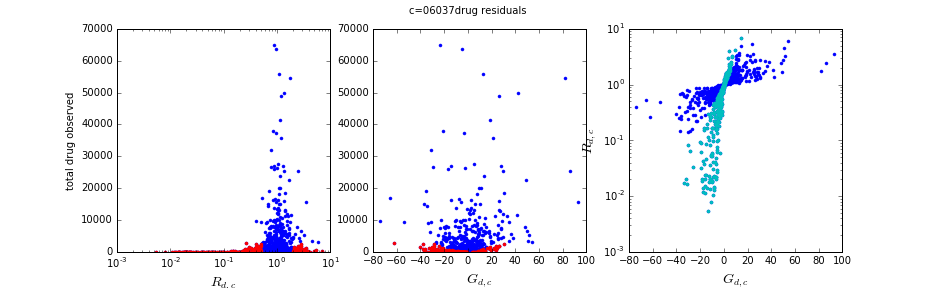

In [12]:
Image(filename='png/06037_resid.png',width=900)

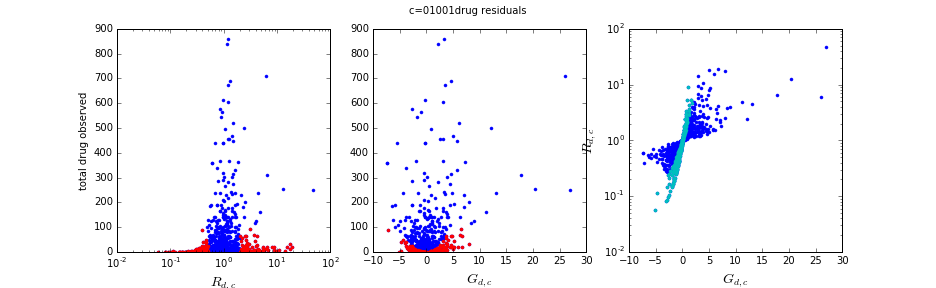

In [13]:
Image(filename='png/01001_resid.png',width=900)



## Standardizing
We can also standardize the populations, to account for the different age distribution, care distribution, etc across counties.  For this, I tried using weights:  $w_{b,d} ={ n_{b,d} \over \sum_b n_{b,d} } $
Then we get the standardized counts: $n_{d,c} = \sum_b w_{b,d} \cdot n_{b,d,c}$; $ y_{d,c} = \sum_b w_{b,d} \cdot y_{b,d,c} $;

For example, below I compare for each **bin** the weights from the nationwide counts (x-axis), againts the fraction of data on women in LA falling into each bin.  There is general agreement (linear relationship), but some bins are more represented in LA than in the USA.  I highlighted in **red** the bins containing (yearRx = 1, yearsObserved=1, year=2).  It seems the LA records are more sparse for people observed in year 2 than is generally true in the USA


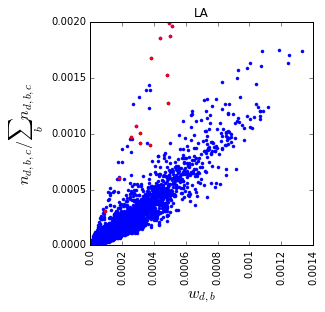

In [3]:
Image(filename='png/weights.png',width=300)

In [1]:
from IPython.display import Image